# Step 1: Import Essential Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Read the dataset
df = pd.read_csv("website_Dataset.csv")
df

,Month,Visit
0,2022-01,1200
1,2022-02,1250
2,2022-03,1300
3,2022-04,1350
4,2022-05,1400
5,2022-06,1450
6,2022-07,1500
7,2022-08,1550
8,2022-09,1600
9,2022-10,1650


# Step 2: Convert 'Month' column to datetime format

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

# Step 3: Set 'Month' as the index

In [4]:
df.set_index('Month', inplace=True)

In [5]:
# First 5 rows of the dataset
df.head()

,Visit
Month,
2022-01-01,1200
2022-02-01,1250
2022-03-01,1300
2022-04-01,1350
2022-05-01,1400


In [6]:
# Last 5 rows of the dataset
df.tail()

,Visit
Month,
2023-08-01,2250
2023-09-01,2300
2023-10-01,2350
2023-11-01,2400
2023-12-01,2450


In [7]:
# shape of the dataset
df.shape

(24, 1)

In [8]:
# Check Missing Values
df.isnull().sum()

Visit    0
dtype: int64

In [9]:
# Check Statistical Summary
df.describe()

,Visit
count,24.000000
mean,1802.083333
std,389.391713
min,1200.000000
25%,1487.500000
50%,1775.000000
75%,2125.000000
max,2450.000000


In [10]:
# Check Dtype and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Visit   24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


Text(0.5, 1.0, 'Visiting')

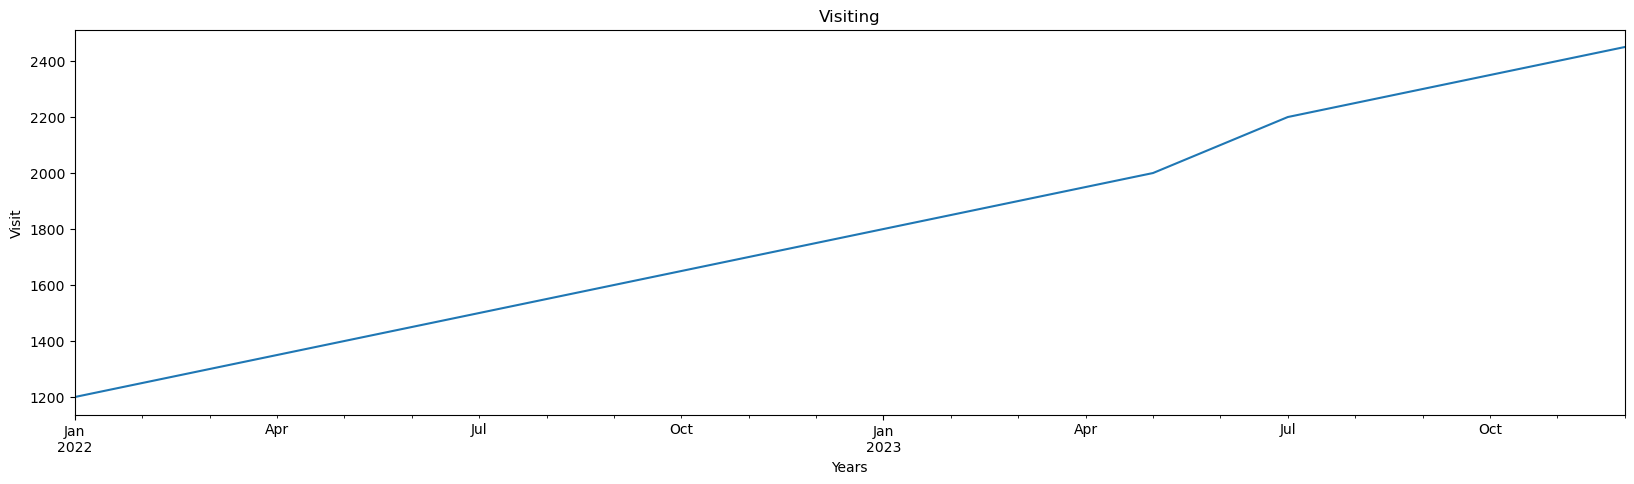

In [11]:
# Plot for the "Visit" Column
plt.figure(figsize = (20,5))
df['Visit'].plot()
plt.xlabel("Years")
plt.ylabel("Visit")
plt.title("Visiting")

# Step 4: Decomposition


In [12]:
# Decomposition of data
# It shows individually Trend, Seasonality, and Residuals
close_series = df['Visit']
decomposition = seasonal_decompose(close_series, model='additive', period=12)

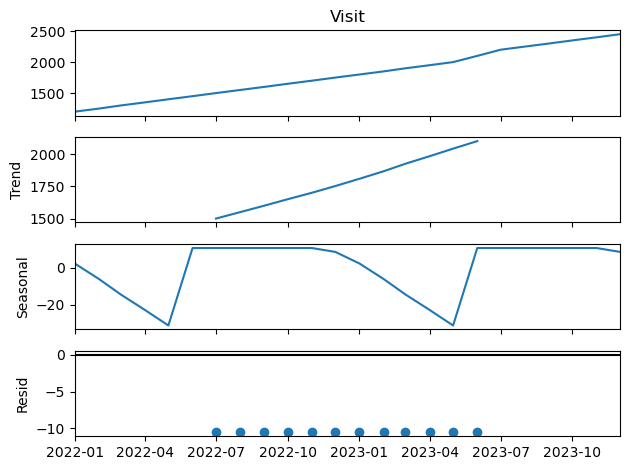

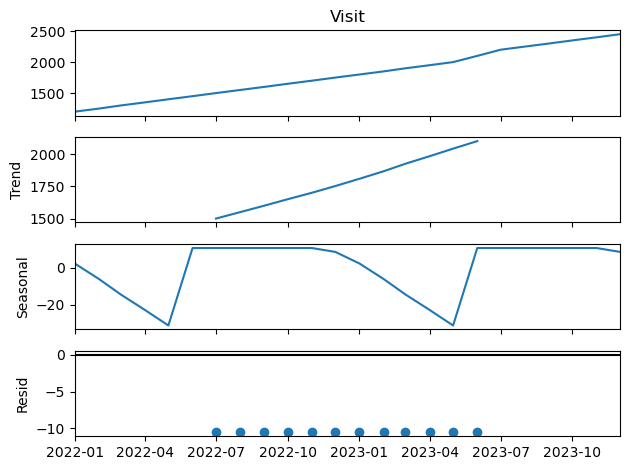

In [13]:
# Show the plot
decomposition.plot()

# Step 5: ADF Test

In [23]:
# Check for stationarity Using ADF Test
# 
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics",result[0])
    print("p Value:",result[1])
    if result[1] <= 0.5:
        print("Data is Statinarity")
    else:
        print("Data is not statinarity")

In [24]:
adf_test(df['Visit'])

ADF Statistics 1.7320508075688776
p Value: 0.9982042849867909
Data is not statinarity


In [25]:
# Differencing to remove trend and seasonality

df['Visit_diff'] = df['Visit'].diff()
df = df.dropna(subset=['Visit_diff'])

C:\Users\AMIT KUMAR\AppData\Local\Temp\ipykernel_1784\1601750612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Visit_diff'] = df['Visit'].diff()


In [26]:
df['Visit_diff']

Month
2022-03-01     50.0
2022-04-01     50.0
2022-05-01     50.0
2022-06-01     50.0
2022-07-01     50.0
2022-08-01     50.0
2022-09-01     50.0
2022-10-01     50.0
2022-11-01     50.0
2022-12-01     50.0
2023-01-01     50.0
2023-02-01     50.0
2023-03-01     50.0
2023-04-01     50.0
2023-05-01     50.0
2023-06-01    100.0
2023-07-01    100.0
2023-08-01     50.0
2023-09-01     50.0
2023-10-01     50.0
2023-11-01     50.0
2023-12-01     50.0
Name: Visit_diff, dtype: float64

In [27]:
# Again I am checking ADE Test
adf_test(df['Visit_diff'])

ADF Statistics -3.259601202601325
p Value: 0.016783749321595043
Data is Statinarity


# Step 6: # Plot ACF and PACF

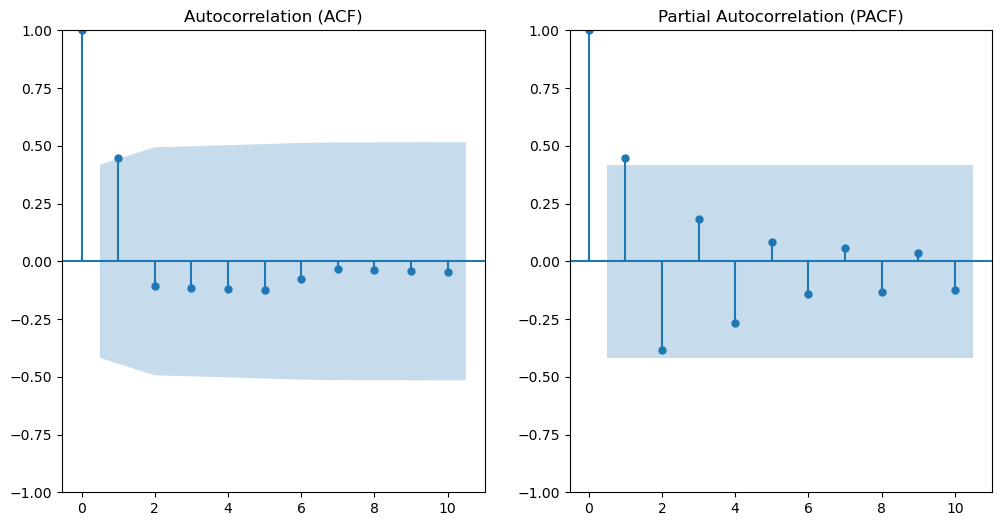

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df['Visit_diff'], lags=10, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(df['Visit_diff'], lags=10, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

plt.show()

In [22]:
df['Visit_diff'].describe()

count     23.000000
mean      54.347826
std       14.405203
min       50.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      100.000000
Name: Visit_diff, dtype: float64

In [32]:
train_size = int(len(df)*0.8)
train,test = df.iloc[:train_size],df.iloc[train_size:]

In [33]:
print("Train size:", len(train))
print("Test size:", len(test))

Train size: 17
Test size: 5


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


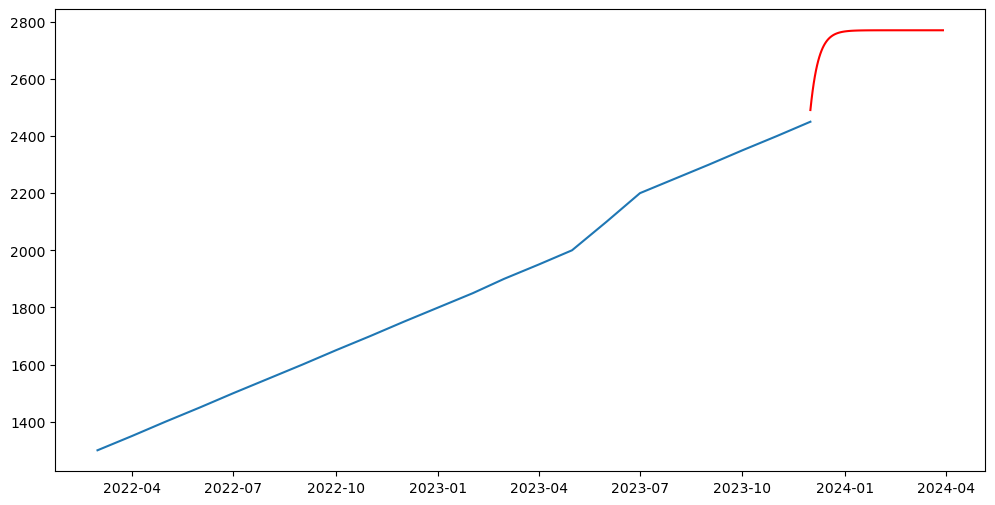

In [34]:
# Fit ARIMA model
model_arima = ARIMA(df['Visit'], order=(1, 1, 1))   # (p,d,q)
result_arima = model_arima.fit()

# Forecast next 365 days
forecast = result_arima.forecast(steps=120)
forecast_index = pd.date_range(df.index[-1], periods=120, freq='D')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Visit'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast (Next 365 Days)', color='red')
plt.show()

In [35]:
# Use only the 'Close' column for univariate ARIMA
series = df['Visit']

# Split into train and test
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

#  Predict future values
start_index = len(train)
end_index = start_index + len(test) - 1
predicted_values = result_arima.predict(start=start_index, end=end_index, typ='levels')

# Evaluate prediction using RMSE
rmse = np.sqrt(mean_squared_error(test, predicted_values))
print("Test RMSE:", round(rmse, 2))

Test RMSE: 11.23


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'

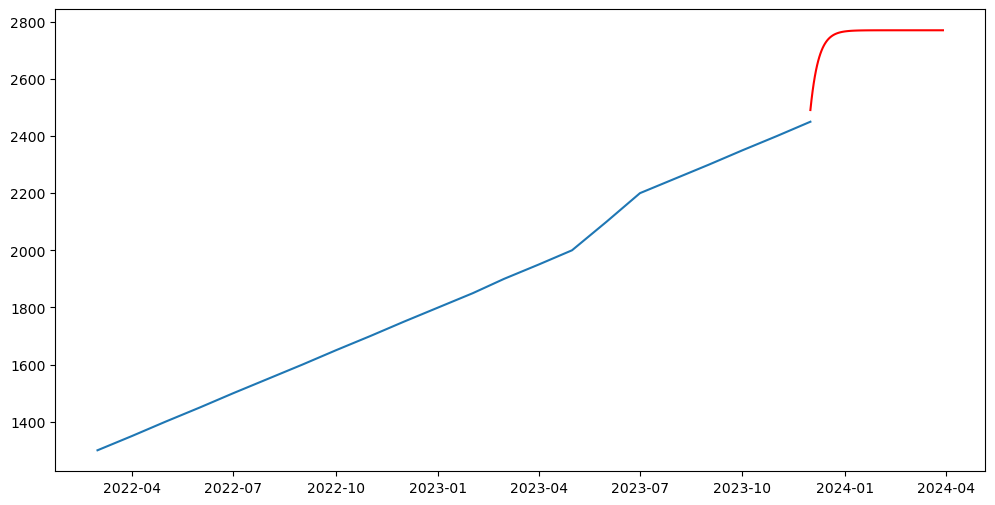

In [36]:
model_sarima = SARIMAX(df['Visit'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 365))
result_sarima = model_sarima.fit()


# Forecast next 30 days
forecast = result_arima.forecast(steps=120)
forecast_index = pd.date_range(df.index[-1], periods=120, freq='D')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Visit'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast (Next 30 Days)', color='red')
plt.show()

In [39]:
# Fit the SARIMA model
model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()

# Predict
start = test.index[0]
end = test.index[-1]
pred_sarima = model_sarima_fit.predict(start=start, end=end, typ='levels')

# Make sure lengths match
pred_sarima = pred_sarima[:len(test)]

# RMSE
rmse_sarima = np.sqrt(mean_squared_error(test, pred_sarima))
print(f'SARIMA RMSE: {rmse_sarima}')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA RMSE: 12.95107603383806


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
